In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [3]:
print(nx.__version__, mpl.__version__)

3.1 3.7.2


In [4]:
teams = nx.read_gml('football/football.gml')
teams = nx.convert_node_labels_to_integers(teams, label_attribute='name')

In [6]:
N = teams.number_of_nodes()
E = teams.number_of_edges()
density = E / (N*(N-1)/2)

In [7]:
nx.is_connected(teams)

True

In [8]:
connected = nx.is_connected(teams)

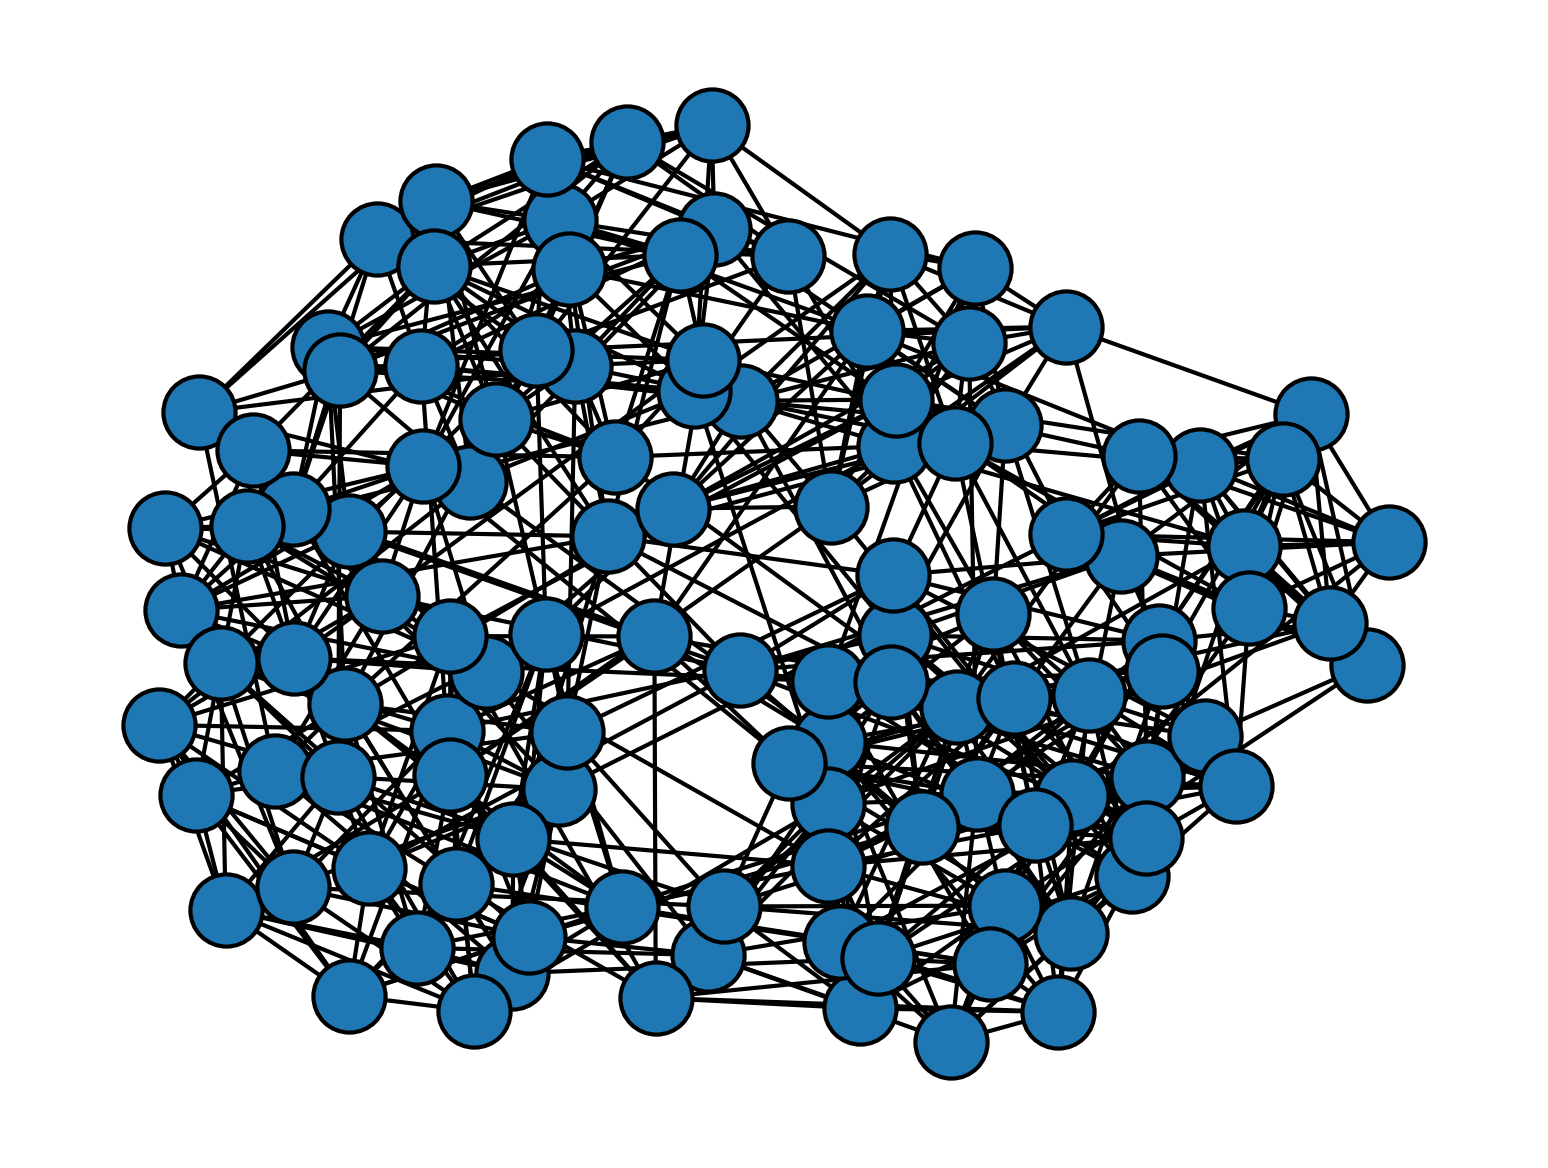

In [12]:
teams.graph['pos'] = nx.kamada_kawai_layout(teams)
plt.figure(dpi=300)
nx.draw_networkx(teams, teams.graph['pos'],
                 edgecolors='k',
                 with_labels=False)
plt.axis(False)
plt.show()

In [13]:
teams.degree

DegreeView({0: 12, 1: 12, 2: 12, 3: 12, 4: 11, 5: 12, 6: 12, 7: 12, 8: 11, 9: 11, 10: 10, 11: 10, 12: 10, 13: 11, 14: 10, 15: 12, 16: 11, 17: 11, 18: 11, 19: 11, 20: 11, 21: 11, 22: 11, 23: 11, 24: 10, 25: 11, 26: 10, 27: 11, 28: 9, 29: 11, 30: 11, 31: 11, 32: 11, 33: 10, 34: 11, 35: 11, 36: 8, 37: 11, 38: 11, 39: 11, 40: 11, 41: 10, 42: 7, 43: 11, 44: 11, 45: 11, 46: 11, 47: 11, 48: 11, 49: 11, 50: 9, 51: 11, 52: 10, 53: 12, 54: 10, 55: 11, 56: 10, 57: 10, 58: 10, 59: 8, 60: 11, 61: 11, 62: 11, 63: 9, 64: 11, 65: 11, 66: 11, 67: 12, 68: 11, 69: 11, 70: 11, 71: 10, 72: 11, 73: 11, 74: 11, 75: 10, 76: 11, 77: 11, 78: 11, 79: 11, 80: 11, 81: 11, 82: 11, 83: 11, 84: 11, 85: 9, 86: 11, 87: 11, 88: 12, 89: 11, 90: 9, 91: 11, 92: 11, 93: 10, 94: 10, 95: 10, 96: 10, 97: 8, 98: 11, 99: 10, 100: 11, 101: 10, 102: 10, 103: 10, 104: 12, 105: 10, 106: 11, 107: 10, 108: 10, 109: 11, 110: 11, 111: 11, 112: 10, 113: 10, 114: 11})

In [16]:
k_min = min([k for n, k in teams.degree])
k_min_idx = [n for n, k in teams.degree if k == k_min]
k_min_name = [teams.nodes[idx]['name'] for idx in k_min_idx]
k_min_name

['Connecticut']

In [19]:
[teams.nodes[n]['name'] for n in teams[k_min_idx[0]]]

['Akron',
 'BallState',
 'BostonCollege',
 'Buffalo',
 'EasternMichigan',
 'Louisville',
 'MiddleTennesseeState']

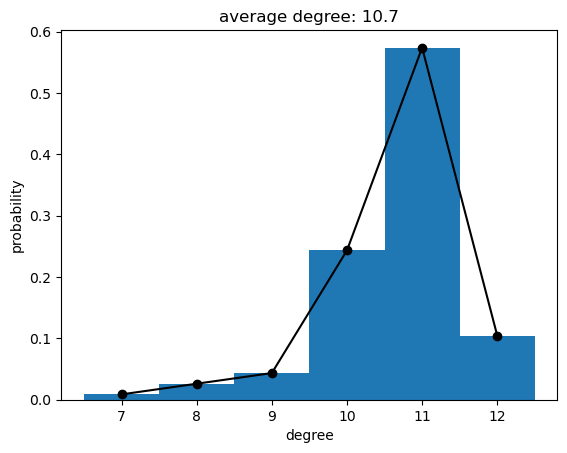

In [31]:
# Degree
k_hist = nx.degree_histogram(teams)
# k_max = len(k_hist) - 1
# x = range(k_min, k_max + 1)
# y = np.array(k_hist)[x]
x = np.where(np.array(k_hist) > 0)[0]
y = np.array(k_hist)[x] / N
# plt.figure(dpi=100)
plt.plot(x, y, 'ko-')
plt.hist([k for n, k in teams.degree],bins=np.arange(k_min-0.5, len(k_hist)+0.5), density=True)

plt.xlabel('degree')
plt.ylabel('probability')
k_avg = np.mean([k for n, k in teams.degree])
plt.title('average degree: %.3g' % k_avg)
plt.show()

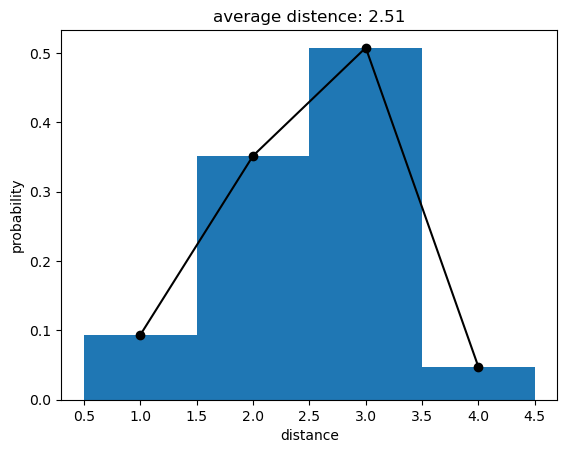

In [38]:
# Shortest path
plt.figure()
L_s = [nx.shortest_path_length(teams, i, j)
     for i in range(N) for j in range(i)]
L_min, L_max = min(L_s), max(L_s)
plt.hist(L_s, bins=np.arange(L_min-0.5, L_max+1.5), density=True)

probs, edges = np.histogram(L_s, bins=np.arange(L_min-0.5, L_max+1.5), density=True)
plt.plot(range(L_min, L_max+1), probs, 'ko-')

L_avg = np.mean(L_s)
plt.title('average distence: %.3g' % L_avg)
plt.xlabel('distance')
plt.ylabel('probability')

plt.show()

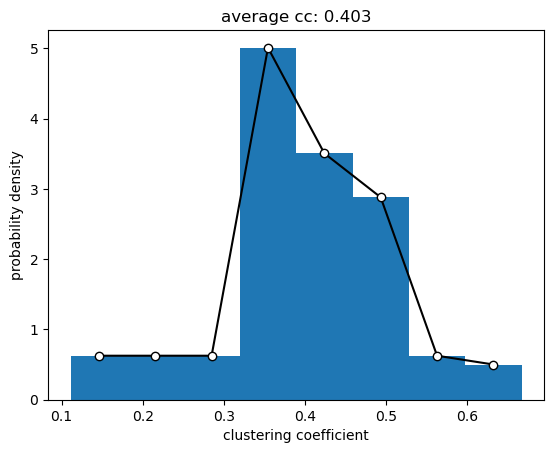

In [40]:
# clustering coefficient
plt.figure()
C = list(nx.clustering(teams).values())
plt.hist(C, bins='sturges', density=True)

probs, edges = np.histogram(C, bins='sturges', density=True)
cents = (edges[1:]+edges[:-1])/2
plt.plot(cents, probs, 'ko-', mfc='w')

plt.title('average cc: %.3g' % np.mean(C))
plt.xlabel('clustering coefficient')
plt.ylabel('probability density')
plt.show()

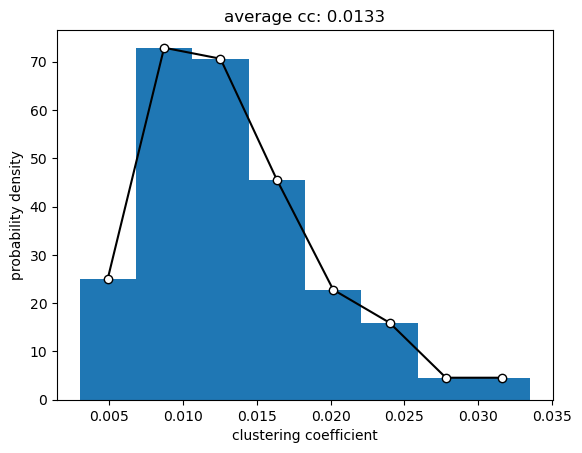

In [43]:
# betweenness centrality
plt.figure()
C = list(nx.betweenness_centrality(teams).values())
plt.hist(C, bins='sturges', density=True)

probs, edges = np.histogram(C, bins='sturges', density=True)
cents = (edges[1:]+edges[:-1])/2
plt.plot(cents, probs, 'ko-', mfc='w')

plt.title('average cc: %.3g' % np.mean(C))
plt.xlabel('clustering coefficient')
plt.ylabel('probability density')
plt.show()